In [33]:
from PIL import Image
# import imutils
import numpy as np
import os # used for navigating to image path
import imageio # used for writing images
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from helpers import *
from itertools import product

In [34]:
LABELED_IMAGES_DIR = '../../data/tidy/labeled-images'
CONFLICT_SPLIT_DIR = '../../data/tidy/labeled-split-images'

In [35]:
if not os.path.exists(CONFLICT_SPLIT_DIR): # check if 'tidy/preprocessed_images' subdirectory does not exist
        os.makedirs(CONFLICT_SPLIT_DIR)

In [39]:
def tile(filename, dir_in, dir_out, d=9):
    tiles = []
    name, ext = os.path.splitext(filename)
    img = Image.open(os.path.join(dir_in, filename))
    rotate_img= img.rotate(270)
    rotate_img.show() 
    w, h = rotate_img.size
    print (rotate_img.size)
    grid = product(range(0, h, int(h/d)), range(0, w, int(w/d)))
    for i, j in grid:
        print(i,j)
        box = (j, i, j+int(w/d), i+int(h/d))
        out = os.path.join(dir_out, f'{name}_{i}_{j}{ext}')
        t = rotate_img.crop(box)
        t.save(out)
        tiles.append(t)
    return tiles, filename

In [40]:
t = tile('improbable-2.jpg', LABELED_IMAGES_DIR, CONFLICT_SPLIT_DIR)

(4032, 3024)
0 0
0 448
0 896
0 1344
0 1792
0 2240
0 2688
0 3136
0 3584
336 0
336 448
336 896
336 1344
336 1792
336 2240
336 2688
336 3136
336 3584
672 0
672 448
672 896
672 1344
672 1792
672 2240
672 2688
672 3136
672 3584
1008 0
1008 448
1008 896
1008 1344
1008 1792
1008 2240
1008 2688
1008 3136
1008 3584
1344 0
1344 448
1344 896
1344 1344
1344 1792
1344 2240
1344 2688
1344 3136
1344 3584
1680 0
1680 448
1680 896
1680 1344
1680 1792
1680 2240
1680 2688
1680 3136
1680 3584
2016 0
2016 448
2016 896
2016 1344
2016 1792
2016 2240
2016 2688
2016 3136
2016 3584
2352 0
2352 448
2352 896
2352 1344
2352 1792
2352 2240
2352 2688
2352 3136
2352 3584
2688 0
2688 448
2688 896
2688 1344
2688 1792
2688 2240
2688 2688
2688 3136
2688 3584


In [41]:
def plotTilesGrid(tiles):
    plt.figure(figsize=(9,9)) # specifying the overall grid size

    for i in range(81):
        plt.subplot(9,9,i+1)    # the number of images in the grid is 9*9 (81)
        plt.imshow(tiles[0][i])

    plt.savefig(CONFLICT_SPLIT_DIR+"/split_grid_"+str(tiles[1])+".png")
    plt.show()

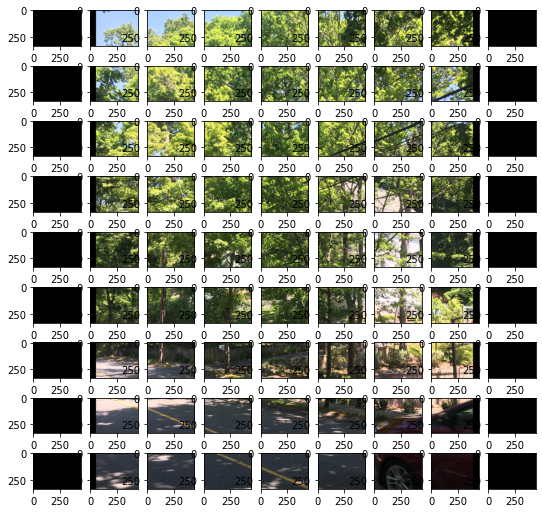

In [42]:
plotTilesGrid(t)